In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file_path = 'all_pp_posts_right_all_posts.csv'
df_left = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [3]:
# convertendo o tipo data que esta como string em objeto no formato data
df_left["created_time"] = pd.to_datetime(df_left['created_time'])

In [4]:
df_left.head(15)

,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author
0,2018-01-01 05:18:07+00:00,890711084350263_1622765804478117,moro nega vez pedido defesa lula bronca,moro nega mais uma vez pedido da defesa de lul...,48,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,429,15,0,0,2,16,True,right_all_posts
1,2018-01-01 03:14:06+00:00,890711084350263_1622657961155568,retrospectiva abaixoassinado apoio moro maior ...,retrospectiva 2017 -abaixo-assinado em apoio a...,207,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,885,2,2,0,0,36,True,right_all_posts
2,2018-01-01 02:37:05+00:00,890711084350263_1622629394491758,retrospectiva abaixoassinado online pede impea...,retrospectiva 2017 -abaixo-assinado online que...,40,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,131,3,0,0,1,3,True,right_all_posts
3,2018-03-04 18:25:16+00:00,890711084350263_1687695304651833,filha neta lula ficam eleicoes,filha e neta de lula ficam fora das eleicoes d...,28,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,68,19,2,0,1,3,True,right_all_posts
4,2018-03-04 15:35:21+00:00,890711084350263_1687526398002057,pezao deve tornar governador denunciado lava jato,pezao deve se tornar o 1o governador denunciad...,245,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,496,26,5,0,7,27,True,right_all_posts
5,2018-03-04 14:47:13+00:00,890711084350263_1687483061339724,mensalao levou anos ser julgado janot stf petr...,mensalao levou 7 anos para ser julgado com jan...,37,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,45,7,0,2,12,0,True,right_all_posts
6,2018-03-04 12:25:15+00:00,890711084350263_1687365041351526,relator reforma previdencia acusado receber me...,relator da reforma da previdencia e acusado de...,24,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,40,3,2,0,10,0,True,right_all_posts
7,2018-03-05 21:58:59+00:00,890711084350263_1688918007862896,jogada mestre juiz amigo sergio moro autoriza ...,com `` jogada de mestre '' juiz amigo de sergi...,237,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,1051,51,7,0,2,110,True,right_all_posts
8,2018-03-05 21:41:13+00:00,890711084350263_1688902821197748,eleicoes rodrigo maia confirma precandidatura ...,eleicoes 2018 : rodrigo maia confirma sua pre-...,38,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,68,49,2,0,40,0,True,right_all_posts
9,2018-03-05 21:34:12+00:00,890711084350263_1688896857865011,celso mello estaria querendo salvar lula,celso de mello estaria querendo salvar lula ? ...,29,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,92,0,6,2,83,0,True,right_all_posts


In [5]:
n_total_posts = len(df_left)
print('número total de posts: {0}'.format(str(df_left)))

número total de posts:                    created_time                                 id  \
0     2018-01-01 05:18:07+00:00   890711084350263_1622765804478117   
1     2018-01-01 03:14:06+00:00   890711084350263_1622657961155568   
2     2018-01-01 02:37:05+00:00   890711084350263_1622629394491758   
3     2018-03-04 18:25:16+00:00   890711084350263_1687695304651833   
4     2018-03-04 15:35:21+00:00   890711084350263_1687526398002057   
...                         ...                                ...   
49514 2021-10-17 18:20:20+00:00  1708330669405230_3153884611516488   
49515 2021-10-17 16:45:29+00:00  1708330669405230_3153829738188642   
49516 2021-10-17 11:44:20+00:00  1708330669405230_3153637564874526   
49517 2021-10-17 02:44:44+00:00  1708330669405230_3153347271570222   
49518 2021-10-17 02:07:13+00:00  1708330669405230_3153330081571941   

                                   pre_processed_message  \
0                moro nega vez pedido defesa lula bronca   
1      retrospec

In [6]:
n_posts_with_textual_messages = df_left[df_left.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_left[df_left.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 38335
número de posts sem mensagens textuais: 11184


In [7]:
#============================================================================================
# realizando o tf idf no df['pre_processed_message'] do corpus inteiro
#============================================================================================

# tf idf é uma medida estatística que tem o intuito de indicar a importância de uma palavra 
# de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

def sort_columns(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)


def extract_top_n_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

cv = CountVectorizer()

word_count_vector=cv.fit_transform(df_left['pre_processed_message'])

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# you only needs to do this once, this is a mapping of index to 
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
corpus=' '.join(df_left['pre_processed_message'])

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([corpus]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_columns(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_top_n_from_vector(feature_names,sorted_items,10)

print("\n===Keywords=== (todos os posts de todos os candidatos no período analisado)")
for key in keywords:
    print(key,keywords[key])
    


/home/lucas/ufop/tcc/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



===Keywords=== (todos os posts de todos os candidatos no período analisado)
bolsonaro 0.364
brasil 0.259
presidente 0.231
governo 0.134
jair 0.129
lula 0.118
ser 0.117
todos 0.108
contra 0.105
dia 0.103


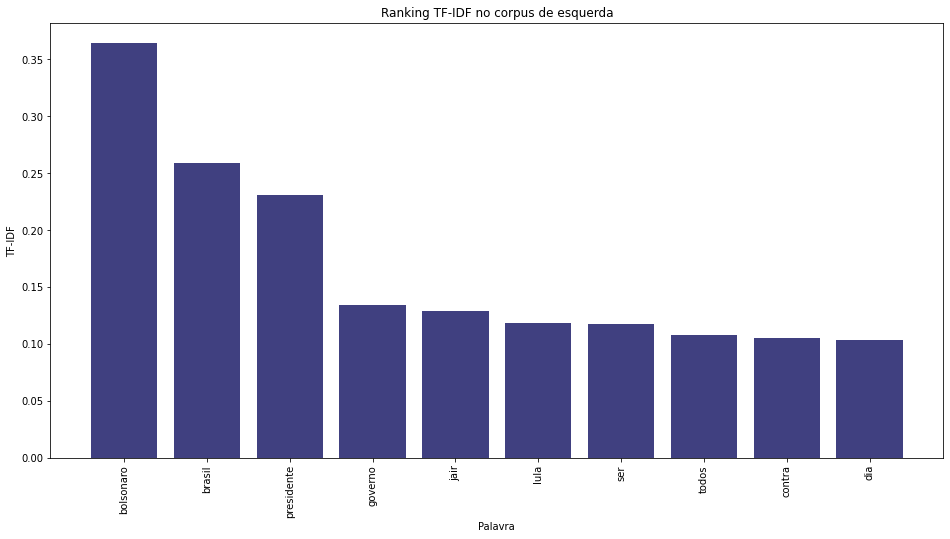

In [8]:
#=======================================================================
# visualização das top palavras
#=======================================================================

words, word_values = key,keywords

words = list(word_values.keys())
word_values = list(word_values.values())

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values,color='#404080');
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Ranking TF-IDF no corpus de esquerda');
ax.set_ylabel('TF-IDF');
ax.set_xlabel('Palavra');


plt.ticklabel_format(style='plain', axis='y')


    
plt.show()

In [9]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

bolsonaro : 11307
brasil : 6792
presidente : 5748
jair : 2725
governo : 2623
lula : 2284
ser : 2238
todos : 2099
contra : 2017
dia : 2009
pais : 1904
stf : 1772
federal : 1710
vai : 1702
ministro : 1681
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0


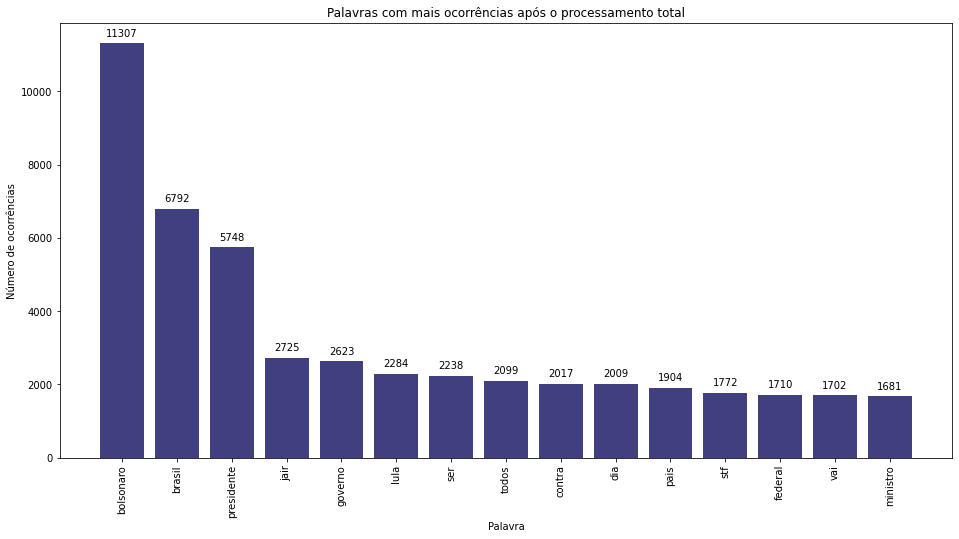

In [10]:
#=======================================================================
# visualização das top palavras
#=======================================================================

count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df_left['pre_processed_message'])

for index in range(len(word_values)):
    print('{0} : {1}'.format(str(words[index]),str(word_values[index])))
    
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values,color='#404080');
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Palavras com mais ocorrências após o processamento total');
ax.set_xlabel('Palavra');
ax.set_ylabel('Número de ocorrências');

for rect in ax.patches:
    height = rect.get_height()
    print(rect.get_x()+rect.get_width()/2)
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.show()